<a href="https://colab.research.google.com/github/santisalam/clase_econometria/blob/main/taller_heterocedasticidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Santiago salamanca 
Vanessa Gil


TALLER

En un notebook resuelva:

1.)Con el dataset sleep75:
Construya un modelo que explique el tiempo de sueño de los individuos del dataset (seleccione las variables que considere relevantes).

2.)Verifique si para el modelo construido existe heterocedasticidad.
Con el dataset hprice1 estime los coeficientes del siguiente modelo:

Verifique si existe o no heterocedasticidad.
3.)Con el dataset vote1, estime un modelo cuya variable dependiente sea votea y las variables independientes sean prtystra, democa, log(expenda y log(expendb. 
Verifique si existe heterocedasticidad.

4.)Con los datos de fertil2:



1.   Construya un modelo que explique el número de niños vivos (children).

2. Verifique si para el modelo construido existe heterocedasticidad.



El ejercicio se puede realizar en grupos (no más de tres personas) y debe entregarse vía GitHub.
juanpablo chavez,
sergio andrés pineda carreño

In [ ]:
!pip install wooldridge
import wooldridge as wd 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as smd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#punto 1

In [ ]:
df=wd.data("sleep75")

In [ ]:
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0.0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500.0,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500.0,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500.0,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500.0,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500.0,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500.0,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500.0,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500.0,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       706 non-null    int64  
 1   black     706 non-null    int64  
 2   case      706 non-null    int64  
 3   clerical  706 non-null    float64
 4   construc  706 non-null    float64
 5   educ      706 non-null    int64  
 6   earns74   706 non-null    float64
 7   gdhlth    706 non-null    int64  
 8   inlf      706 non-null    int64  
 9   leis1     706 non-null    int64  
 10  leis2     706 non-null    int64  
 11  leis3     706 non-null    int64  
 12  smsa      706 non-null    int64  
 13  lhrwage   532 non-null    float64
 14  lothinc   706 non-null    float64
 15  male      706 non-null    int64  
 16  marr      706 non-null    int64  
 17  prot      706 non-null    int64  
 18  rlxall    706 non-null    int64  
 19  selfe     706 non-null    int64  
 20  sleep     706 non-null    int64 

In [ ]:
df.isna().sum()

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64

In [ ]:
wd.data('sleep75', description=True)

name of dataset: sleep75
no of variables: 34
no of observations: 706

+----------+--------------------------------+
| variable | label                          |
+----------+--------------------------------+
| age      | in years                       |
| black    | =1 if black                    |
| case     | identifier                     |
| clerical | =1 if clerical worker          |
| construc | =1 if construction worker      |
| educ     | years of schooling             |
| earns74  | total earnings, 1974           |
| gdhlth   | =1 if in good or excel. health |
| inlf     | =1 if in labor force           |
| leis1    | sleep - totwrk                 |
| leis2    | slpnaps - totwrk               |
| leis3    | rlxall - totwrk                |
| smsa     | =1 if live in smsa             |
| lhrwage  | log hourly wage                |
| lothinc  | log othinc, unless othinc < 0  |
| male     | =1 if male                     |
| marr     | =1 if married                  |
| prot    

#punto 2

In [ ]:
dv=wd.data("hprice1")

In [ ]:
dv

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.100006,4,6126.0,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.500000,3,9903.0,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.699997,3,5200.0,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.800003,3,4600.0,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.100006,4,6095.0,2514,1,5.921578,5.765504,8.715224,7.829630
...,...,...,...,...,...,...,...,...,...,...
83,295.0,318.299988,3,6056.0,1837,1,5.686975,5.762994,8.708805,7.515889
84,236.0,259.399994,3,5828.0,1715,0,5.463832,5.558371,8.670429,7.447168
85,202.5,258.100006,3,6341.0,1574,0,5.310740,5.553347,8.754792,7.361375
86,219.0,232.000000,2,6362.0,1185,0,5.389072,5.446737,8.758098,7.077498


In [ ]:
dv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     88 non-null     float64
 1   assess    88 non-null     float64
 2   bdrms     88 non-null     int64  
 3   lotsize   88 non-null     float64
 4   sqrft     88 non-null     int64  
 5   colonial  88 non-null     int64  
 6   lprice    88 non-null     float64
 7   lassess   88 non-null     float64
 8   llotsize  88 non-null     float64
 9   lsqrft    88 non-null     float64
dtypes: float64(7), int64(3)
memory usage: 7.0 KB


In [ ]:
X = dv[['lotsize', 'sqrft', 'bdrms']]

In [ ]:
y = dv['price']

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              767.4
Date:                Fri, 12 May 2023   Prob (F-statistic):                    2.01e-61
Time:                        14:49:23   Log-Likelihood:                         -483.16
No. Observations:                  88   AIC:                                      972.3
Df Residuals:                      85   BIC:                                      979.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#punto 3


In [ ]:
vote1=wd.data("vote1")

In [ ]:
vote1

,state,district,democA,voteA,expendA,expendB,prtystrA,lexpendA,lexpendB,shareA
0,AL,7,1,68,328.295990,8.737000,41,5.793916,2.167567,97.407669
1,AK,1,0,62,626.377014,402.476990,60,6.439952,5.997638,60.881039
2,AZ,2,1,73,99.607002,3.065000,55,4.601233,1.120048,97.014763
3,AZ,3,0,69,319.690002,26.281000,64,5.767352,3.268846,92.403702
4,AR,3,0,75,159.220993,60.054001,66,5.070293,4.095244,72.612473
...,...,...,...,...,...,...,...,...,...,...
168,WV,4,0,39,32.039001,152.270996,42,3.466954,5.025662,17.383217
169,WI,3,1,32,22.625999,359.800995,53,3.119100,5.885551,5.916420
170,WI,5,0,36,197.460007,1278.526001,36,5.285536,7.153463,13.378174
171,WI,7,0,38,202.591003,450.716003,46,5.311189,6.110837,31.010078


In [ ]:
vote1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     173 non-null    object 
 1   district  173 non-null    int64  
 2   democA    173 non-null    int64  
 3   voteA     173 non-null    int64  
 4   expendA   173 non-null    float64
 5   expendB   173 non-null    float64
 6   prtystrA  173 non-null    int64  
 7   lexpendA  173 non-null    float64
 8   lexpendB  173 non-null    float64
 9   shareA    173 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 13.6+ KB


In [ ]:
vote1['log_expendA'] = np.log(vote1['expendA'])
vote1['log_expendB'] = np.log(vote1['expendB'])


In [ ]:
X = vote1[['prtystrA', 'democA', 'log_expendA', 'log_expendB']]
y = vote1['voteA']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X).fit()

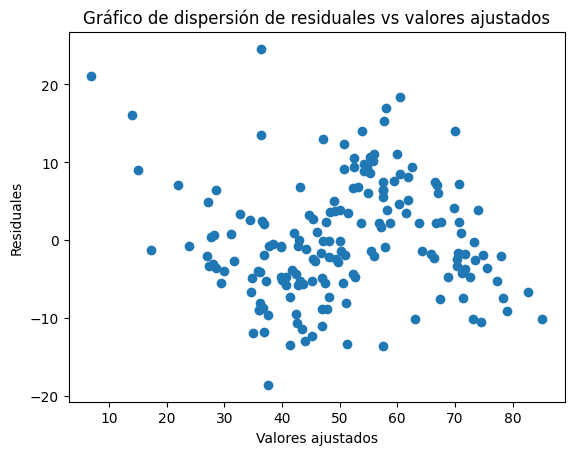

In [ ]:
residuals = model.resid
predicted_values = model.fittedvalues
plt.scatter(predicted_values, residuals)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuales')
plt.title('Gráfico de dispersión de residuales vs valores ajustados')
plt.show()

#punto 4


In [ ]:
dg=wd.data("fertil2")

In [ ]:
dg

,mnthborn,yearborn,age,electric,radio,tv,bicycle,educ,ceb,agefbrth,...,heduc,agesq,urban,urb_educ,spirit,protest,catholic,frsthalf,educ0,evermarr
0,5,64,24,1.0,1.0,1.0,1.0,12,0,NaN,...,NaN,576,1,12,0,0,0,1,0,0
1,1,56,32,1.0,1.0,1.0,1.0,13,3,25.0,...,12.0,1024,1,13,0,0,0,1,0,1
2,7,58,30,1.0,0.0,0.0,0.0,5,1,27.0,...,7.0,900,1,5,1,0,0,0,0,1
3,11,45,42,1.0,0.0,1.0,0.0,4,3,17.0,...,11.0,1764,1,4,0,0,0,0,0,1
4,5,45,43,1.0,1.0,1.0,1.0,11,2,24.0,...,14.0,1849,1,11,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,6,72,16,0.0,1.0,0.0,0.0,7,0,NaN,...,NaN,256,0,0,0,1,0,1,0,0
4357,1,60,28,0.0,1.0,0.0,0.0,7,2,19.0,...,NaN,784,0,0,0,1,0,1,0,0
4358,11,63,24,0.0,1.0,0.0,0.0,5,4,13.0,...,NaN,576,0,0,0,1,0,0,0,0
4359,1,62,26,0.0,1.0,0.0,0.0,0,1,25.0,...,7.0,676,0,0,1,0,0,1,1,1


In [ ]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mnthborn  4361 non-null   int64  
 1   yearborn  4361 non-null   int64  
 2   age       4361 non-null   int64  
 3   electric  4358 non-null   float64
 4   radio     4359 non-null   float64
 5   tv        4359 non-null   float64
 6   bicycle   4358 non-null   float64
 7   educ      4361 non-null   int64  
 8   ceb       4361 non-null   int64  
 9   agefbrth  3273 non-null   float64
 10  children  4361 non-null   int64  
 11  knowmeth  4354 non-null   float64
 12  usemeth   4290 non-null   float64
 13  monthfm   2079 non-null   float64
 14  yearfm    2079 non-null   float64
 15  agefm     2079 non-null   float64
 16  idlnchld  4241 non-null   float64
 17  heduc     1956 non-null   float64
 18  agesq     4361 non-null   int64  
 19  urban     4361 non-null   int64  
 20  urb_educ  4361 non-null   int6

In [ ]:
X = dg[["age", "educ", "catholic"]]
y = dg["children"]


In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               children   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     1845.
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        15:47:45   Log-Likelihood:                -7881.7
No. Observations:                4361   AIC:                         1.577e+04
Df Residuals:                    4357   BIC:                         1.580e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9970      0.094    -21.247      0.0

In [ ]:
bp_test = smd.het_breuschpagan(model.resid, model.model.exog)

In [ ]:
bp_test

(1054.4847189580023,
 5.551187246689373e-227,
 347.2942845687937,
 7.813804152290915e-260)

In [ ]:
print('Breusch-Pagan test: p-value =', bp_test[1])

Breusch-Pagan test: p-value = 5.551187246689373e-227


La variable "children" no es muy bien explicada por las variables que se utilizan como explicativas. El intercepto, que es significativo y positivo, indica que si todas las variables explicativas (edad, educación y religión católica) son cero, se espera que el número de hijos vivos sea de 1.43. El coeficiente de edad es significativo y positivo, lo que sugiere que a medida que la edad aumenta, se espera que también aumente el número de hijos vivos. El coeficiente de educación es significativo y negativo, lo que implica que a medida que la educación aumenta, se espera que disminuya el número de hijos vivos. El coeficiente de religión católica es significativo y positivo, lo que indica que una persona católica se espera que tenga más hijos vivos que una persona no católica.